In [2]:
import tweepy as tw
import pandas as pd 
import os


consumer_key = 'Wk8EGJubNo0X6r8ght6bjvIcS'
consumer_secret = "45FvGtUm4CrCxW3jbJctogWB5Bj9pz2SzLhrUdHYjV8xqOMnP0"
access_token = "1030506160191877121-WOyqfY1lY79LHvolQBP5ABxTawieXm"
access_token_secret = "QWuvNp6WEKnMldRxQ3IyiQQcN6bgkJJoxpna7IpXFi9RI"
  

ModuleNotFoundError: No module named 'tweepy'

In [47]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [48]:
search_words = "#coronavirus"
date_since = "2019-11-01"

In [51]:
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(5000)

users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.text,tweet.created_at] for tweet in tweets]


In [88]:
tweet_ = pd.DataFrame(data=users_locs, 
                    columns=['user', "location",'tweet','created_at'])
tweet_

,user,location,tweet,created_at
0,EvilMorty242420,,RT @Stats_Alerts: BREAKING:\n20 French citizen...,2020-02-02 20:15:38
1,BruceCr01405174,"Queensland, Australia",RT @RDNS_TAI: Last week #scottyfrommarketting ...,2020-02-02 20:15:37
2,WDEL,"Wilmington, DE",RT @acherry13: #BREAKING | Delaware resident t...,2020-02-02 20:15:37
3,TadofMiami,,RT @jenniferatntd: Notice about stock market i...,2020-02-02 20:15:37
4,RobertoDreamer,Peru,RT @PDChina: The #1st death outside China from...,2020-02-02 20:15:37
...,...,...,...,...
4995,willarosehip,,RT @maree_jun: A relative of mine from China j...,2020-02-02 19:33:49
4996,saltyjbk,Florida,RT @charlot57790100: Residents are being locke...,2020-02-02 19:33:47
4997,mohsin360FX,"Edmonton, Alberta",RT @Jkylebass: 8 doctors in Wuhan identified t...,2020-02-02 19:33:47
4998,MikeBisson8,,"RT @SecAzar: At this time, the risk to America...",2020-02-02 19:33:47


In [89]:
def original(tweet): 
    if tweet.split()[0] == 'RT': 
        return tweet.split()[1][1:-1]
    return None 

tweet_['original_creator'] = tweet_['tweet'].map(original)

In [92]:
def original(tweet): 
    if tweet.split()[0] == 'RT': 
        return 1
    return 0 

tweet_['retweet'] = tweet_['tweet'].map(retweet)

In [93]:
tweet_['original_creator'].value_counts()

TomValletti       428
RT_com            241
sotiridi          133
UNHumanRights     117
CGTNOfficial       82
                 ... 
InvincibleBull      1
BasuAshis           1
FixTheNation        1
echewy              1
NigeriaGov          1
Name: original_creator, Length: 879, dtype: int64

In [95]:
tweet_['retweet'].value_counts()

1    5000
Name: retweet, dtype: int64

In [98]:
tweet_['user'].value_counts()

sumanebot          30
bitcoinconnect     24
beldandolo         23
Sridhar85990867    14
waterfall8888      12
                   ..
elle__keane         1
CurrencyFM          1
vicciho             1
PreventionTips      1
sxnflxwxer          1
Name: user, Length: 4032, dtype: int64

In [100]:
tweet_.to_csv('tweets.csv')

In [117]:
import pandas as pd 
df = pd.read_csv('tweets.csv', index_col=None, header=0, engine='python' )

,Unnamed: 0,user,location,tweet,created_at,original_creator,retweet
0,0,EvilMorty242420,NaN,RT @Stats_Alerts: BREAKING:\n20 French citizen...,2/2/20 20:15,Stats_Alerts,1.0
1,1,BruceCr01405174,"Queensland, Australia",RT @RDNS_TAI: Last week #scottyfrommarketting ...,2/2/20 20:15,RDNS_TAI,1.0
2,2,WDEL,"Wilmington, DE",RT @acherry13: #BREAKING | Delaware resident t...,2/2/20 20:15,acherry13,1.0
3,3,TadofMiami,NaN,RT @jenniferatntd: Notice about stock market i...,2/2/20 20:15,jenniferatntd,1.0
4,4,RobertoDreamer,Peru,RT @PDChina: The #1st death outside China from...,2/2/20 20:15,PDChina,1.0


In [137]:
df.groupby(['original_creator'])['user'])

TypeError: list indices must be integers or slices, not str

In [13]:
import networkx as nx

Nodes in RT network: 4715
Edges in RT network: 4616


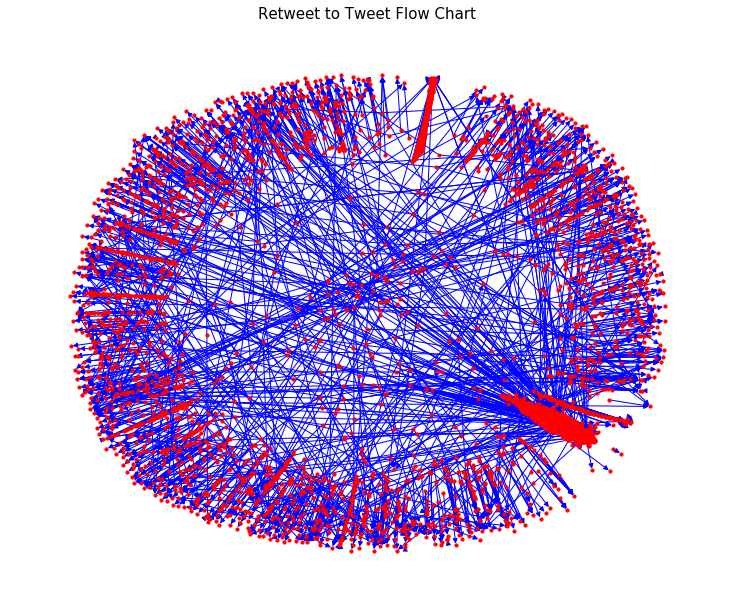

In [32]:
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    df,
    source = 'user', 
    target = 'original_creator',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
nx.draw(G_rt, node_size=10, edge_color='blue', node_color='red')
plt.title('Retweet to Tweet Flow Chart', size=15)
plt.show()

In [49]:
graph_centrality = nx.degree_centrality(G_rt)
sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[(nan, 0.11964361476453118),
 ('TomValletti', 0.09079338141705558),
 ('RT_com', 0.048366567670767927),
 ('UNHumanRights', 0.024819686041578276),
 ('sotiridi', 0.01951633432329232)]

In [51]:
graph_closeness = nx.closeness_centrality(G_rt)
sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)[:5]

[(nan, 0.18096194737723306),
 ('TomValletti', 0.09079338141705558),
 ('RT_com', 0.048162627621858724),
 ('UNHumanRights', 0.024821468680811316),
 ('sotiridi', 0.019306481266052618)]

In [57]:
graph_betweenness = nx.betweenness_centrality(G_rt, normalized=True, endpoints=False)
sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

[('RT_com', 9.841338900100983e-06),
 ('sotiridi', 3.6861651468601196e-06),
 ('PDChina', 2.028281661831198e-06),
 ('CathayPak', 2.025468511121307e-06),
 ('V2019N', 1.6653852202552971e-06)]

In [130]:
non_duplicates = df['original_creator'].value_counts()
df1=df[df['original_creator'].isin(non_duplicates[non_duplicates>50].index)]

In [131]:
df1['original_creator'].value_counts()

TomValletti        428
RT_com             241
sotiridi           133
UNHumanRights      117
CGTNOfficial        82
jenniferatntd       80
DarrenPlymouth      74
IsChinar            70
howroute            61
globaltimesnews     56
PDChina             52
ASBreakingNews      52
Name: original_creator, dtype: int64

Nodes in RT network: 1324
Edges in RT network: 1356


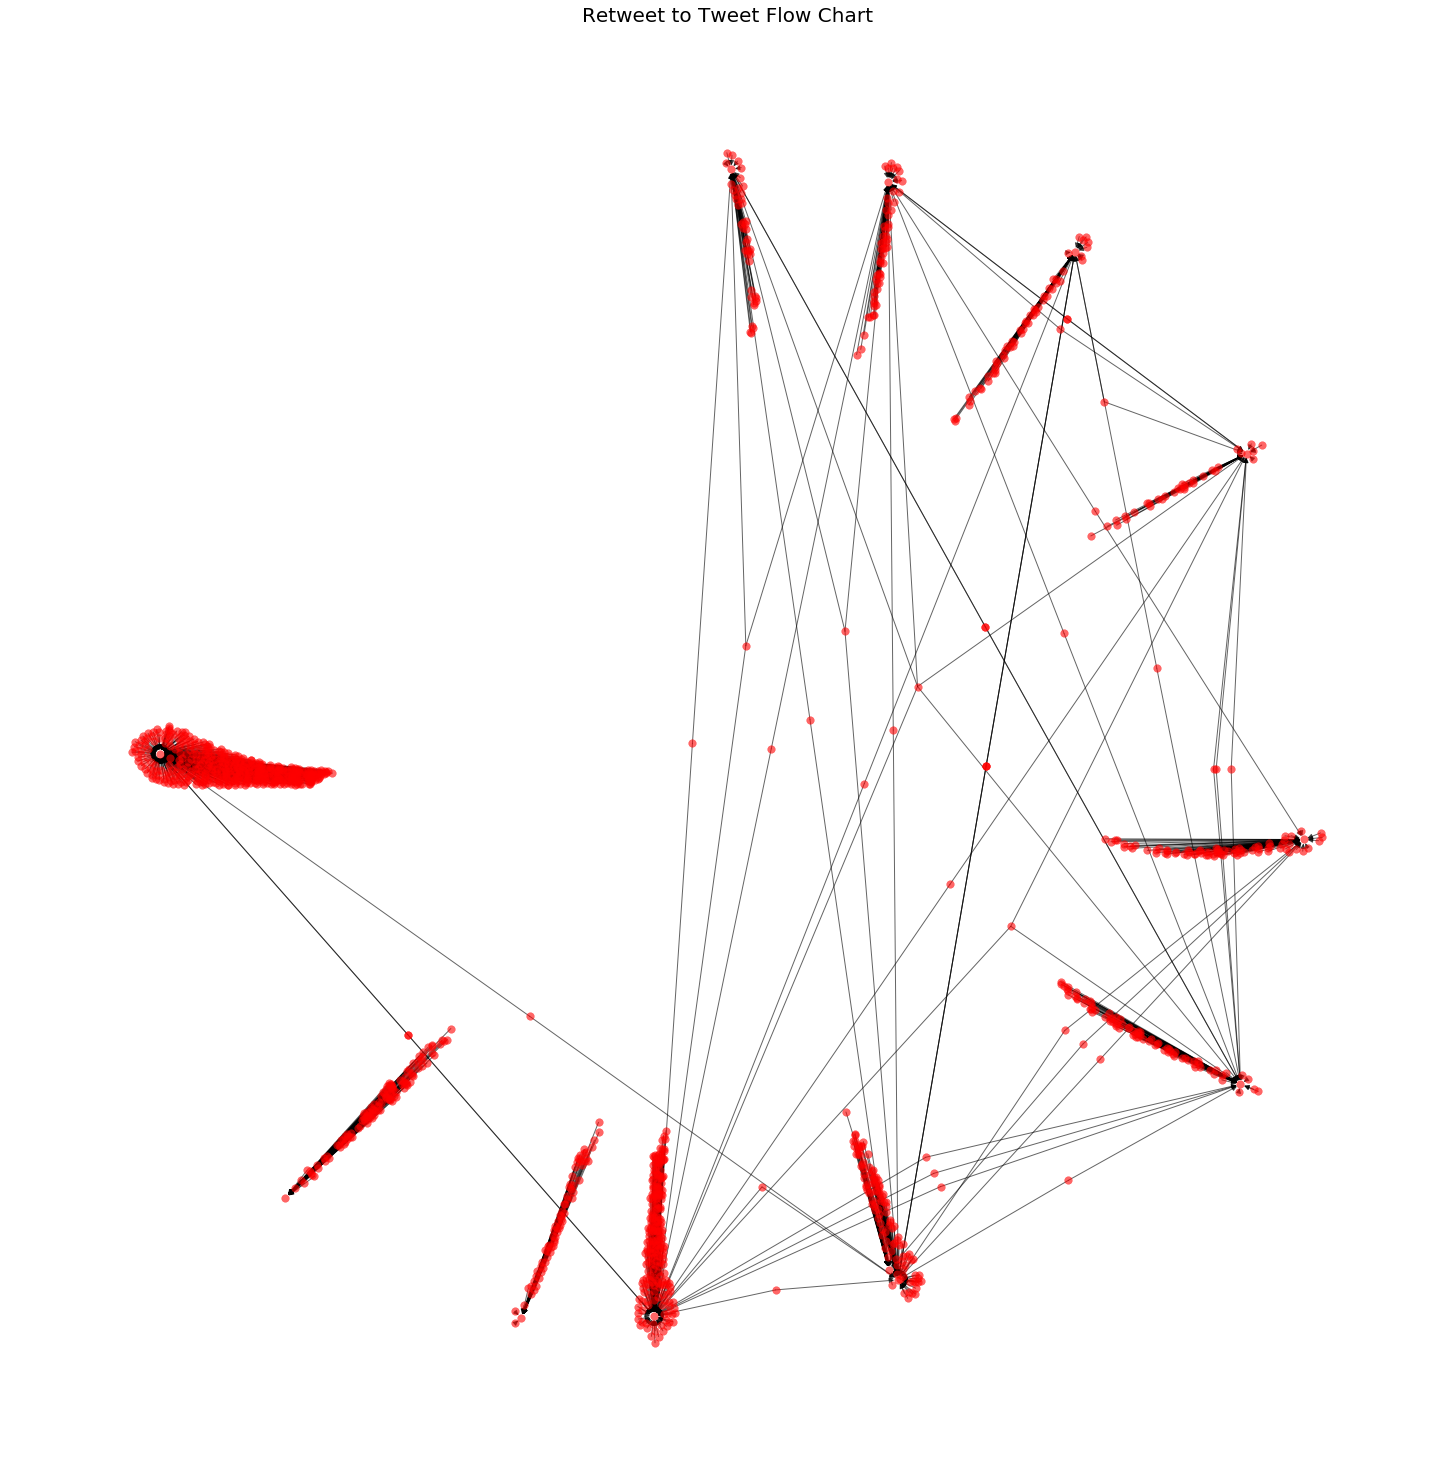

In [132]:
# Create retweet network from edgelist
G_rt1 = nx.from_pandas_edgelist(
    df1,
    source = 'user', 
    target = 'original_creator',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt1.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt1.edges()))

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
nx.draw(G_rt1, node_color="red", cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
plt.title('Retweet to Tweet Flow Chart', size=20)
plt.show()

In [133]:
graph_centrality = nx.degree_centrality(G_rt1)
sorted(graph_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('TomValletti', 0.3235071806500378),
 ('RT_com', 0.17157974300831444),
 ('UNHumanRights', 0.08843537414965986),
 ('sotiridi', 0.06878306878306878),
 ('jenniferatntd', 0.06046863189720333)]

In [134]:
graph_closeness = nx.closeness_centrality(G_rt1)
sorted(graph_closeness.items(), key=lambda x: x[1], reverse=True)[:5]

[('TomValletti', 0.3235071806500378),
 ('RT_com', 0.17157974300831444),
 ('UNHumanRights', 0.08843537414965986),
 ('sotiridi', 0.06878306878306878),
 ('jenniferatntd', 0.06046863189720333)]

In [135]:
graph_betweenness = nx.betweenness_centrality(G_rt1, normalized=True, endpoints=False)
sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

[('TadofMiami', 0.0),
 ('jenniferatntd', 0.0),
 ('RobertoDreamer', 0.0),
 ('PDChina', 0.0),
 ('Myrapetite3', 0.0)]

In [76]:
#plt.figure(figsize = (20,20))
#nx.draw(G_rt1, node_color="red", cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
#nx.draw_networkx_nodes(G_rt1, nodelist=central_nodes, node_size=300, node_color=colors_central_nodes)